In [4]:
import pandas as pd
import numpy as np
import scipy
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from google.colab import drive

sns.set()

In [6]:
drive.mount("/content/drive", force_remount = True)

for dir, subdir, files in os.walk("/content/drive/MyDrive"):
  print(dir, subdir, files, sep = "\n")
  print()


file_path = "/content/drive/MyDrive/MLProcessAZ/Project_Data/music_dataset_mod.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive
/content/drive/MyDrive
['Classroom', 'Colab Notebooks', 'College', 'MLProcessAZ']
['Saharshcvtemp01.pdf', 'Citizen Sleeper - Launch Trailer - Nintendo Switch - Nintendo of America (youtube) (1).mp3']

/content/drive/MyDrive/Classroom
['TE Div A,B,C-2024-25 Elective 1']
[]

/content/drive/MyDrive/Classroom/TE Div A,B,C-2024-25 Elective 1
[]
[]

/content/drive/MyDrive/Colab Notebooks
[]
['DataPreprocessingReference(2).ipynb', 'DataPreprocessingReference(1).ipynb', 'DataPreprocessing.ipynb', 'Practical.ipynb', 'EDA_MLProcess_AZ_Visualization.ipynb', 'Feature_Engineering_1.ipynb', 'Feature_Engineering_2.ipynb', 'FeatureEngineering.ipynb', 'FeatureSelection.ipynb', 'Copy of Colab_section_5_missing_values.ipynb', 'Copy of Colab_section_5_outliers.ipynb', 'Copy of Colab_basic-eda-example.ipynb', 'Copy of Colab_section_7_1_categorical_features.ipynb', 'Copy of Colab_section_7_2_continuous_feature_scaling.ipynb', 'Copy of Colab_section_8_cross_validation.ipynb', 'Copy 

# Data Exploration

In [7]:
df_music_realistic = df.copy()
df_music_realistic

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [8]:
df_music_realistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [10]:
df_music_realistic['Genre'].value_counts()

,count
Genre,
Rock,190
Jazz,190
Country,180
Hip-hop,168
Classical,162


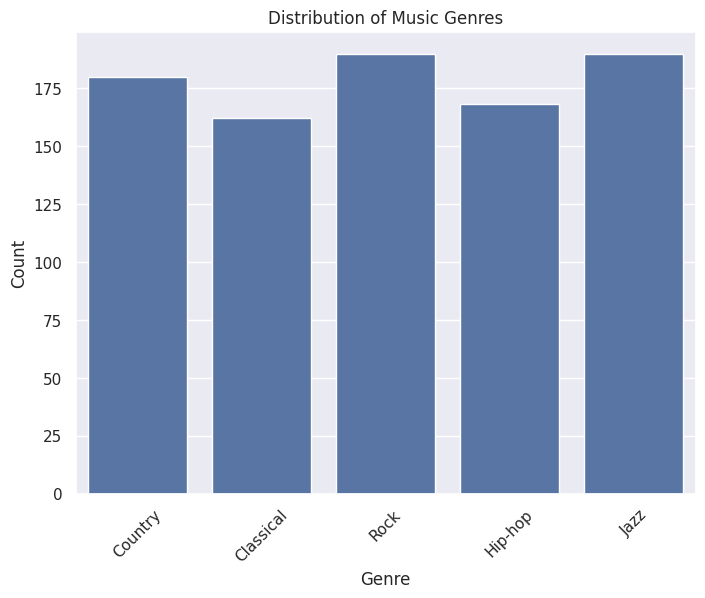

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_music_realistic)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis

In [12]:
#As seen above, since it is our target itself that showcases missing values, I can't impute the missing values or else I risk memory leaks.
df_music_realistic_nonull = df_music_realistic.dropna()
df_music_realistic_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [13]:
# Splitting the dataset into features and target

X = df_music_realistic_nonull.drop(columns=['Genre'])
y = df_music_realistic_nonull['Genre']

In [14]:
# I used ordinal encoding to feature engineer the existing categorical variables

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [15]:
df_with_encoded_genre = df_music_realistic_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded
df_with_encoded_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


In [16]:
# Calculate the correlation matrix

correlation_matrix = df_with_encoded_genre.corr()

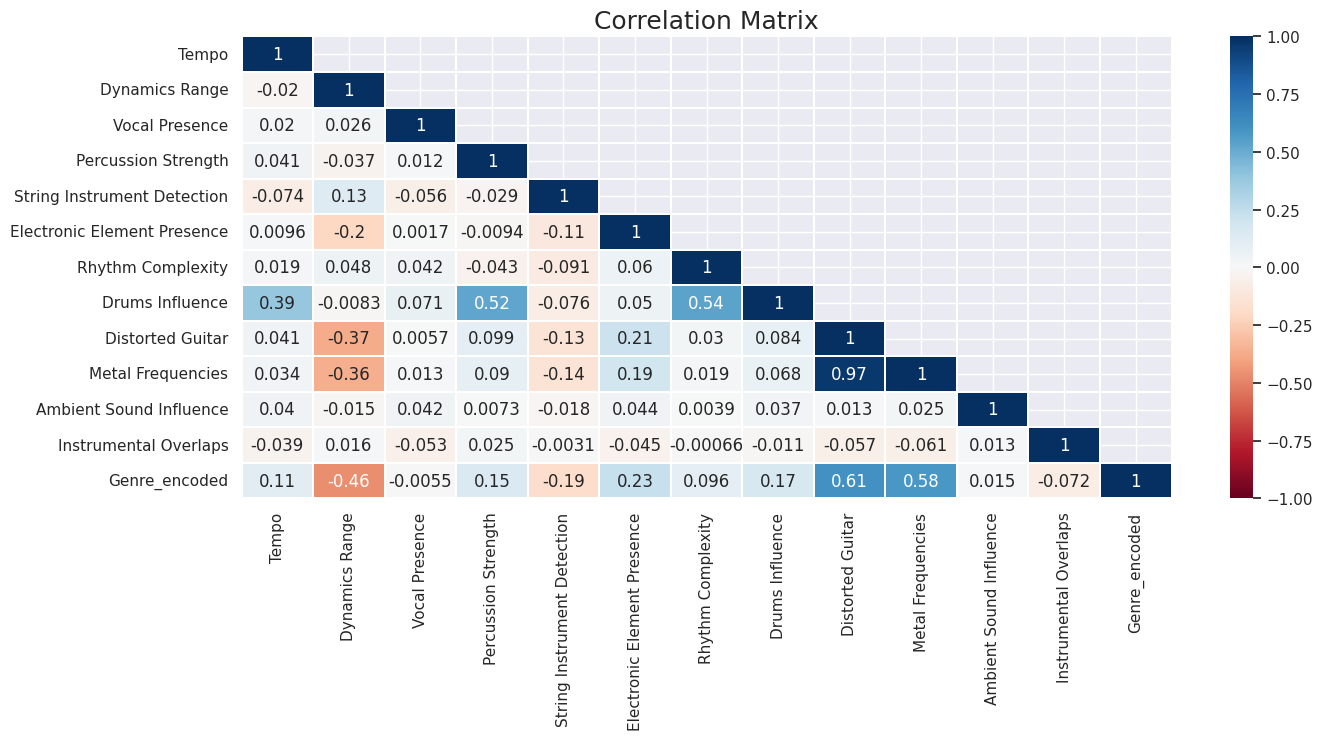

In [21]:
plt.figure(figsize=(15, 6))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k = 1)

sns.heatmap(correlation_matrix,
            mask = mask,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap="RdBu",
            linewidths=0.1)

plt.title("Correlation Matrix", fontsize=18)
plt.yticks(rotation=0)
plt.show()

# PCA for Dimensionality Reduction

In [22]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

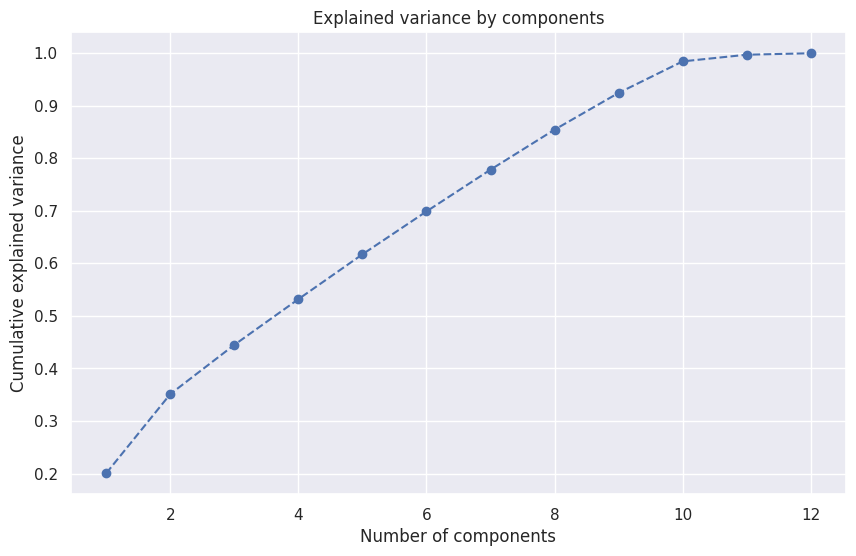

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [26]:
# Given the plot, we can observe the elbow to be around 8-9 and so I use the first eight principal components

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# PCA Data v/s Original Data Evaluation

## PCA Data Evaluation

In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [28]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
y_pred = classifier.predict(X_test)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy with PCA: 0.5355805243445693

Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



## Original Data Evaluation

In [30]:
# train test split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [31]:
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [32]:
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre Prediction and Integration

In [33]:
df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()].copy()
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [36]:
# Prepare the data for prediction
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

y_unknown_pred = classifier.predict(X_unknown_pca)

In [37]:
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [38]:
print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]
